## Mark Lewis - Udacity: Data Science - Assignment 1

### The Dataset
I chose to use the AirBnb listing dataset for the city of Manchester, UK. 

I downloaded the dataset from:http://insideairbnb.com/get-the-data.html

The dataset show AirBnb listings from the city of Manchester. This including information, such as:
* Host information
* Property Name/type
* Geographic location and area
* Price
* Temporal information on reviews


### Questions
At first observation of the dataset, I wanted to understand the following:
* Q1: What locations offer the cheapest & most expensive rentals?
* Q2: How does price effect the number of reviews per month?
* Q3: Do hosts with multiple properties tend to have the same properties (price and type)?



In [1]:
#import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read listings CSV file into pandas dataframe
df = pd.read_csv(r'C:\Users\mrmar\Documents\Udacity_DS\Ass1\UdacityDSAss1\RawData\listings.csv')

### Data Preview & Exploration

One of the first things a Data Scientist does is preview, explore and get to know the data they are dealing with, before any analysis can be done.

This process preceeds the data wrangling process, where data is manipulated in order to be modelled and analyzed appropriately.

The following steps have been done to understand the dataset:

This is probably the first thing I do when I have created a Pandas dataframe. I prevew the first few rows of the dataset to understand the general look of the data.

In [2]:
#preview the dataframe
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2613909,"Comfy family home,central location.",3962880,Soraya & Shahin,Burnage,53.435477,-2.198659,Private room,30,1,23,2016-03-13,1.04,2,365
1,753374,"Comfy Family Home, Central Location",3962880,Soraya & Shahin,Burnage,53.435642,-2.198359,Private room,20,1,63,2015-12-20,1.53,2,0
2,8693211,Very comfortable double in Overlea,45641916,Leah Olwen,Burnage,53.426219,-2.206233,Private room,34,1,16,2016-03-17,2.54,1,141
3,2926014,Nice Double Ensuite w/Parking.,14940107,Ellie,Burnage,53.421159,-2.212176,Private room,30,1,26,2016-03-30,1.29,1,338
4,10379829,3 bedroom house in Burnage,16697099,Mo,Burnage,53.431202,-2.206740,Entire home/apt,351,1,1,2016-04-07,1.00,11,348


Here I have looked at the number of rows and columns to understand the size of the dataset. We can see it has 865 rows, so not a huge dataset.

In [3]:
#Rows, columns of dataframe
df.shape

(865, 15)

Below looks at all of the numeric columns and provides some basic statistics (mean, max, count, etc). This can be useful to see if there are perhaps some anomalous values, by looking at max and min. Furthermore we can start to see if we have blanks or NaNs by looking at the count row, we know there are 865 rows, but for the [reviews_per_month] column there are only 676 values meaning there are likely blanks or NaNs.

In [4]:
#Numerical summary description of dataframe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8.650000e+02,8.650000e+02,865.000000,865.000000,865.000000,865.000000,865.000000,676.000000,865.000000,865.000000
mean,7.428997e+06,2.456177e+07,53.462721,-2.236733,76.395376,1.716763,17.202312,2.142234,4.514451,238.194220
std,3.540403e+06,1.925724e+07,0.024586,0.021186,98.935169,1.530404,30.033808,1.914252,7.006947,129.120589
min,3.952400e+04,1.696900e+05,53.375261,-2.304233,10.000000,1.000000,0.000000,0.030000,1.000000,0.000000
25%,4.687829e+06,6.478345e+06,53.448784,-2.248740,32.000000,1.000000,1.000000,0.727500,1.000000,120.000000
50%,8.170941e+06,1.911733e+07,53.469345,-2.236395,47.000000,1.000000,5.000000,1.550000,1.000000,304.000000
75%,1.060258e+07,4.118826e+07,53.481061,-2.226312,80.000000,2.000000,21.000000,2.960000,3.000000,347.000000
max,1.233911e+07,6.645689e+07,53.530843,-2.160459,1251.000000,14.000000,252.000000,11.050000,26.000000,365.000000


Furthermore, we can use below to indentify exactly where the null values are by the counts of nulls below, which partly matches the analysis above. The [last_review] column was missing from above as it is a date type, not numeric.

In [5]:
#Count of nulls
df.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       189
reviews_per_month                 189
calculated_host_listings_count      0
availability_365                    0
dtype: int64

,host_name,last_review,number_of_reviews
15,Umar,NaN,0
20,Jonathon,NaN,0
22,Elli,NaN,0
24,Umar,NaN,0
35,Chris,NaN,0


For categorical data, it is useful to understand the unique values available in a dataset this size. This can highlight data entry errors, but also just give you an idea of how many unique values there are, which is important on what kind of data visualizations you might use.

In [6]:
#List unique values for column
df.neighbourhood.unique()

array(['Burnage', 'Chorlton', 'Whalley Range', 'Fallowfield',
       'Brooklands', 'Northenden', 'Didsbury West', 'Chorlton Park',
       'Ancoats and Clayton', 'Gorton North', 'Withington', 'Rusholme',
       'Baguley', 'Sharston', 'Higher Blackley', 'Didsbury East',
       'Longsight', 'Bradford', 'Charlestown', 'Cheetham',
       'Miles Platting and Newton Heath', 'Crumpsall', 'Old Moat',
       'Harpurhey', 'Moston', 'Levenshulme', 'Moss Side', 'Hulme',
       'Gorton South', 'Ardwick', 'City Centre'], dtype=object)

In [7]:
#List unique values for column
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Analysis and Modeling

### Question 1: What locations offer the cheapest & most expensive rentals?

**Rationale**

Like most cities different neigbourhoods will be more or less desirabe places to frequent and stay. The assumption would be that the city centre would be the most expensive place to stay.

**Data Wrangling/modeling**

I applied a groupby on the neighbourhood column and got the counts (size) to create a table and plot that shows the grouped neighbourhoods and counts.

**Analysis**

In the Manchester Neighbourhood Listing Count bar graph below, we can see that city centre listing are by far the highest count with over 200 listings, double any other neighbourhood.
The reason why I chose to create this plot, is to see if any neigbourhood had very low counts, it might mean that particularly high or low values might not be representative of the listing price in that neighbourhood, as there are not enough samples to represent a fair sample.
As we can see are quite a few neigbourhoods with less than 10 listings.

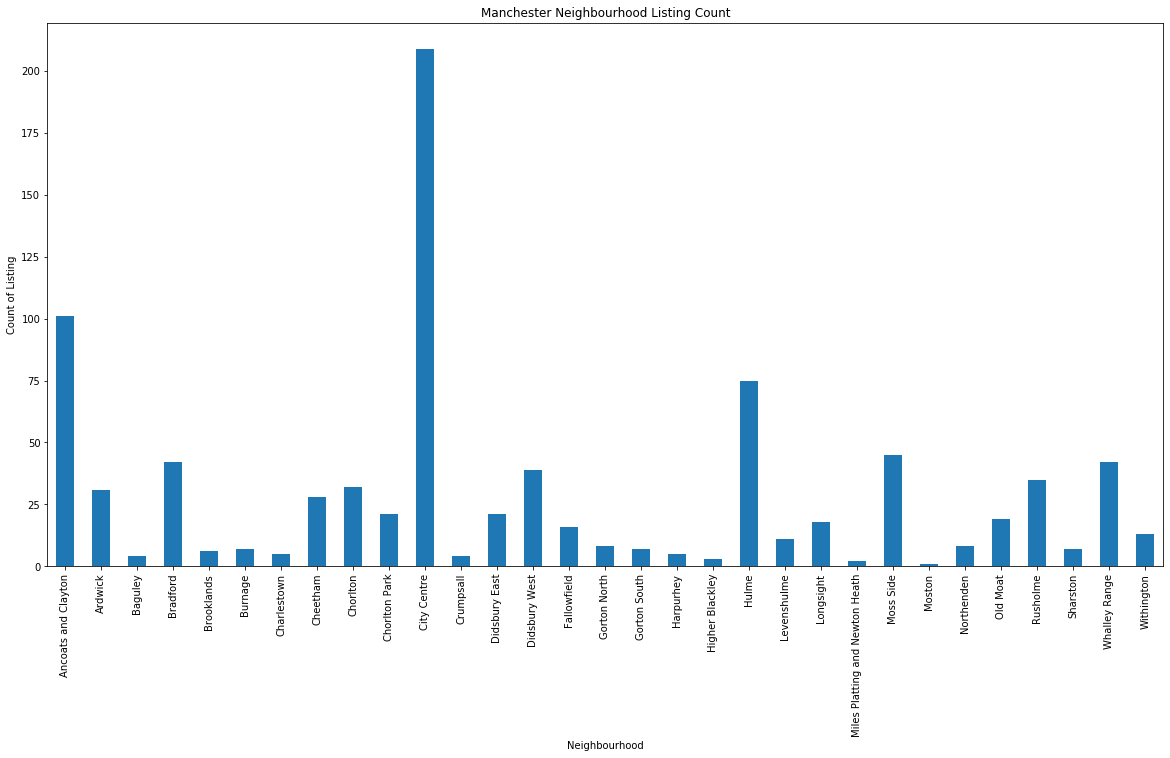

In [8]:
#Groupby neighbourhood column and plot graph
dfQ1 = df.groupby(['neighbourhood']).size().plot.bar(figsize=(20,10), title='Manchester Neighbourhood Listing Count')
#Chart labels
dfQ1.set_xlabel('Neighbourhood')
dfQ1.set_ylabel('Count of Listing')
plt.show()

**Data Wrangling**

I applied a groupby on the neighbourhood & room_type columns and got the mean of the listing price to create a table and plot that shows the grouped neighbourhoods, room type and mean price.

**Analysis**

The most standout items from the Manchester Neighbourhood Vs. Listing price graph below is the mean listing price for the Burnage neighbourhood with entire homes averaging over $350 listing price, which is nearly double any other average listing price. Looking at the bar chart above, this is likely due only a small amount of listing in this area with a small amount of listing with particularly high price. These listing are likely not to be representative of the area, as there is such as small sample size.

The majority of rest of the 'entire room' category neighbourhood range between $80-200. 

Almost all of the neighbourhoods 'private room' categories are below =< $50.

The city centre listing seem to have fairly average listing prices, which is likely due to the high count of listing, making listings more competitive prices.

This analysis might be enhanced by having spatial data such as the neighbourhood areas on a map and colour coding them by price. Furthermore some key landmarks or demographic information might shed more light on why places are more/less expensive, such as crime, proximity to transport or attractions etc.

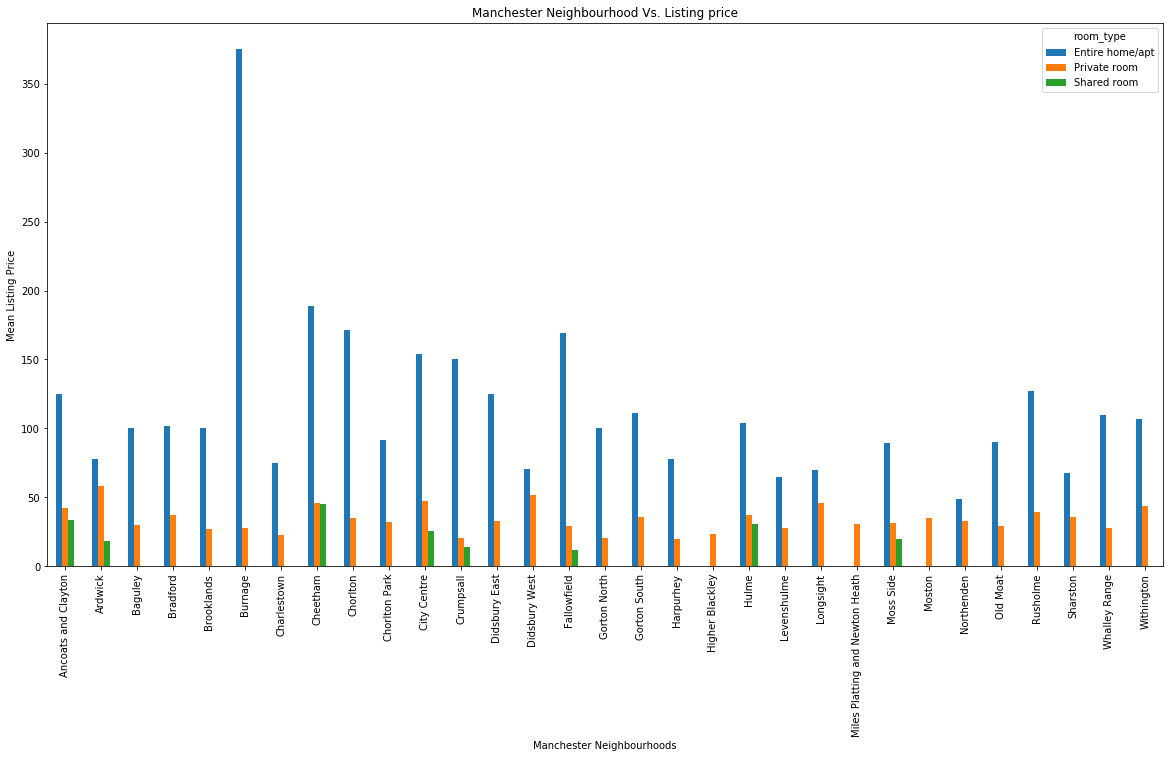

In [9]:
#Groupby 'neighbourhood','room_type' - averaging the list price. 
#Then plot data at grouped bar chart
dfQ1 = df.groupby(['neighbourhood','room_type'])['price'].mean().unstack(fill_value=0).plot.bar(figsize=(20,10),title='Manchester Neighbourhood Vs. Listing price')
#Graph labelling
dfQ1.set_xlabel('Manchester Neighbourhoods')  
dfQ1.set_ylabel('Mean Listing Price')
plt.show()

**Q1 Discussion**

Perhaps neighbourhoods with listing counts below 10 should have been discarded from the analysis, as this threw up some large spikes in average prices, particularly in Burnage area. This was likely causes by one or two properties skewing the mean.

It was initally thought that the city centre listings might have been more expensive that most other areas, but it seems these were quite competitive, likely due to the amount of listings available.

As mentioned above, this analysis would have been enhanced by having spatial data such as the neighbourhood areas, key landmarks or demographic information. As without this spatial context (or local knowledge) it is hard to understand why certain areas might be more/less expensive.

### Question 2: How does price effect the number of reviews per month?

**Rationale**

Does price dictate whether on not someone leaves a review or not. Do people have higher/lower expectations if a property is expensive/cheaper? Meaning they feel more inclined to leave a review if their expectation are not met/exceeded. Or is there no relationship between price and number of reviews?

**Data Wrangling**

During the data Exploration I noticed that there were 189/865 Nulls in [reviews_per_month] column, which is not an insignificant proportion of the rows. There are mutliple ways to deal will Null values, which can include outright removing them or, filling them with a value based on averages, called imputing. Neither option is a perfect solution, as the former is removing data from the analysis and the latter is essentially making up values.
Afer running the below interrogation on the data I decided that removing the Nulls would be a more appropriate, as the [number_of_reviews] column indicates that these listing have likely never had a review, so it would be inappropriate to impute made up values where in reality there have never been values. Also I felt there would be enough remaining rows to understand any meaningful trends.
On the plot I decided to put the Y axis [price] on a log scale, as there were a handful of outlier listing with very high prices, meaning it left the plot more difficult to read where most the data point are.

**Analysis**

By plotting the data in a scatter plot below, with listing price on the Y axis and reviews per month on the X axis it allows us to compare each data point. If there was a correlation between the two parameters you might see a linear trend of data points on the plot. 
As you can see from the graph below, there is little to no linear trends on the plot; most of the points are cluster below the 4 reviews per month count, regardless of the price. It appears the highest price listings don't get many reviews per month (<2). 
It appears listing price does not drive the number of reviews given per month, but perhaps the reviews per month is more of a proxy indicator for number of rentals per month.

This hypothesis would be enhanced by comparing the review ratings and price, I imagine this would provide some interesting insight.

In [27]:
#Check nulls against [number_of_reviews]
df[df.isnull().any(axis=1)][['reviews_per_month', 'number_of_reviews']].head()

,reviews_per_month,number_of_reviews
15,NaN,0
20,NaN,0
22,NaN,0
24,NaN,0
35,NaN,0


Text(0.5, 1.0, 'Reviews Per Month Vs. Listing Price')

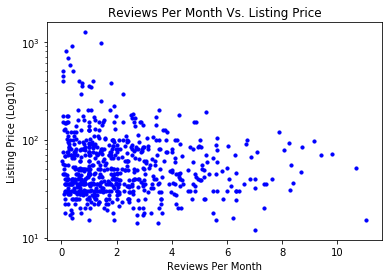

In [24]:
#Drop Nulls
dfQ2 = df.dropna(subset=['reviews_per_month'])

#create plot and axis
fig = plt.figure()
ax = plt.gca()
#plot 'reviews_per_month' vs 'price'
ax.scatter(dfQ2['reviews_per_month'] ,dfQ2['price'] , c='blue', s=10)
ax.set_xlabel('Reviews Per Month') 
ax.set_ylabel('Listing Price (Log10)') 
ax.set_yscale('log')
plt.title('Reviews Per Month Vs. Listing Price')


**Q2 Discussion**

The challenge of what to do with the Null values in for the review data was difficult, but I think the removal of these data points would not have affected the analysis significantly.

It is quite clear that there is no link between the list price and the amount of reviews given per month. 

### Question 3: Do hosts with multiple properties tend to have the same properties (price and type)?

**Rationale**

Is there a difference between the type/price of properties hosts with a portfolio of listing vs. a host with a single listing. Perhaps hosts with one property are just renting out their own place or a spare room for extra money, while hosts with many listings tend to have entire properties for rent, and perhaps charge differently to those with fewer properties.

**Data Wrangling**

Below I grouped the ['calculated_host_listings_count'] column and counted [host_ID] columm, then divided the two values to get the tally of indiviual hosts per ['calculated_host_listings_count'] group. This is useful to know, as it was likely that for hosts with a many properties there were likely to be much fewer hosts.


**Analysis**

The most noticeable thing from the graph below is that the vast majority of the listings are by hosts with < 4 properties, furthermore hosts with 1 property make up around 50% of all listings in Manchester. 
For hosts with > 3 properties listed, they make up a insignificant total of all the hosts and therefore this should be accounted for when analysing the amount of properties listed per host, as this will not represent a good sample of hosts, but the listing portfolio of a few or single host(s).

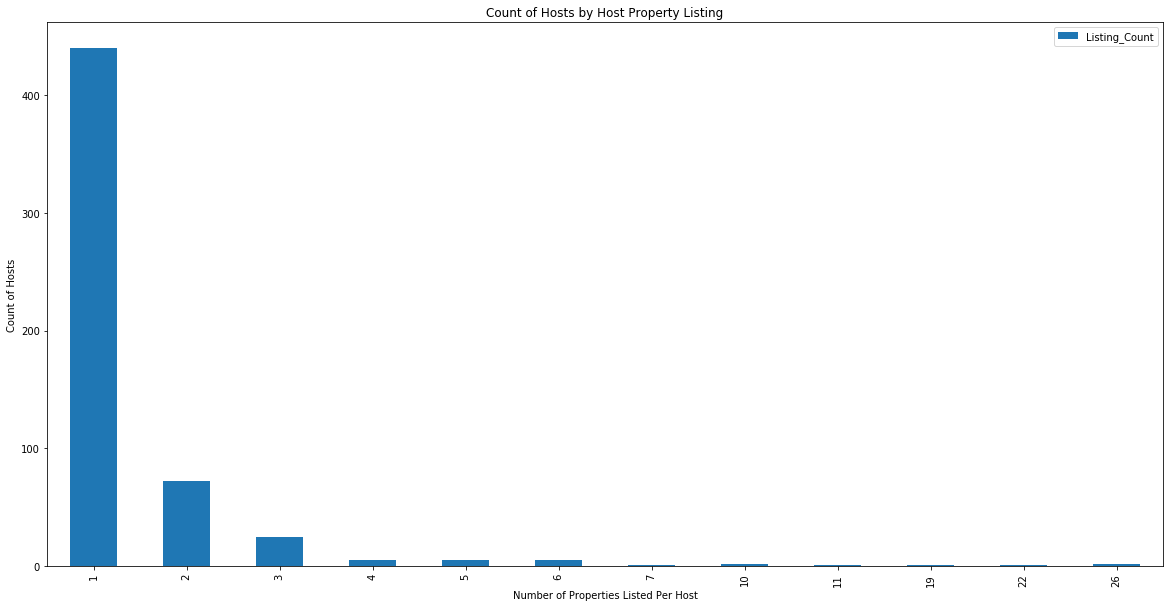

In [11]:
#Group by 'calculated_host_listings_count'
dfQ3 = df.groupby(['calculated_host_listings_count'])['host_id'].size().reset_index()
#Divide hosts count by number of listing per host to get count of number of hosts in each group
div_column = dfQ3['host_id'] / dfQ3['calculated_host_listings_count']
dfQ3["Listing_Count"] = div_column

#Create bar chart
ax = dfQ3.plot.bar(x='calculated_host_listings_count', y="Listing_Count", figsize=(20,10),title='Count of Hosts by Host Property Listing')
ax.set_xlabel('Number of Properties Listed Per Host')  
ax.set_ylabel('Count of Hosts') 
plt.show()

**Data Wrangling/modeling**

Below I grouped the ['calculated_host_listings_count'] and ['room_type'] columms and got the count of these groups to plot as a barchart.


**Analysis**

One of the most striking things about the graph below, is that shared room tend to only exist for hosts with fewer listings. 

For hosts with fewer properties there seems to be more private rooms than entire properties listed. This seems to change for hosts with > 3 listings, whereby they tend to have equal, more, or only entire properties for listing.

As mentioned in the previous graph analysis, for hosts with > 3 properties listed, they make up a insignificant total of all the hosts and therefore this should be accounted for when analysing the amount of properties listed per host.

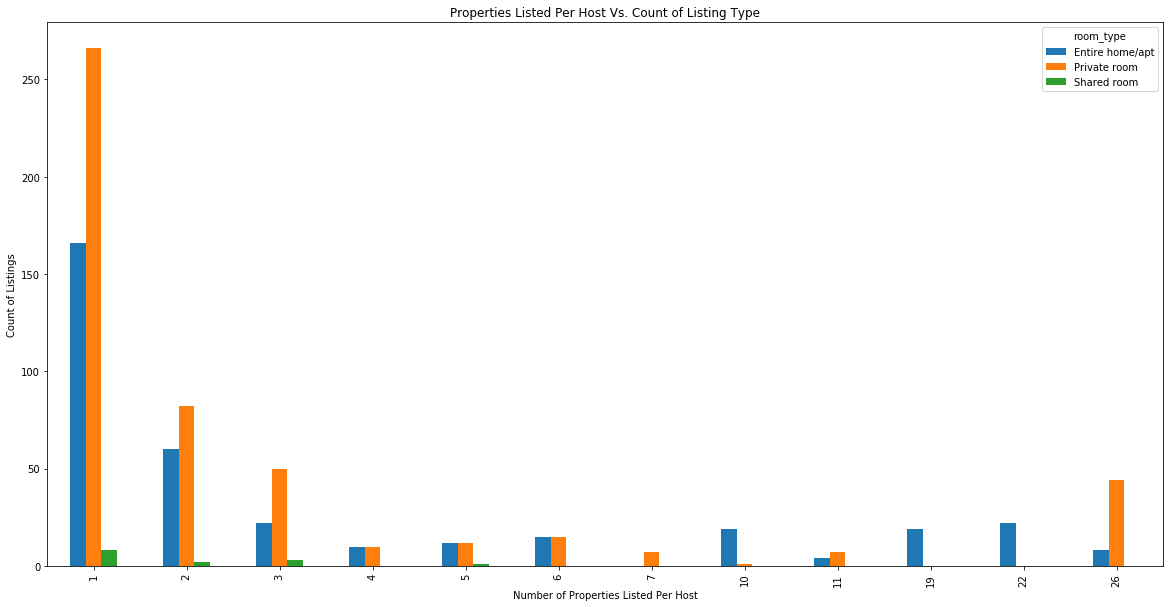

In [12]:
#Group by 'calculated_host_listings_count','room_type' and plot grouped bar graph
dfQ3 = df.groupby(['calculated_host_listings_count','room_type']).size().unstack(fill_value=0).plot.bar(figsize=(20,10),title='Properties Listed Per Host Vs. Count of Listing Type')
dfQ3.set_xlabel('Number of Properties Listed Per Host')  
dfQ3.set_ylabel('Count of Listings')
plt.show()

**Data Wrangling/modeling**

Below I grouped the ['calculated_host_listings_count'] and ['room_type'] columms and got the standard deviation of the list prices for these groups to plot as a barchart. 
Standard deviation of the price was used in order to show the deviation from the mean price of each group. Smaller values will indicate if the listings per group are more similar, larger values indicate the opposite.


**Analysis**

The standout from the graph below indicates that for hosts with > 4 properties the variance in list price high in comparison to  hosts with < 4 listings. This means that hosts with fewer properties tend to have similar list prices. However as previously mentioned, the sample of hosts with listings > 4 are very small and perhaps are not big enough to represent a fair sample. 

For private room listings the standard deviation is somewhat simlar accross the different groups.

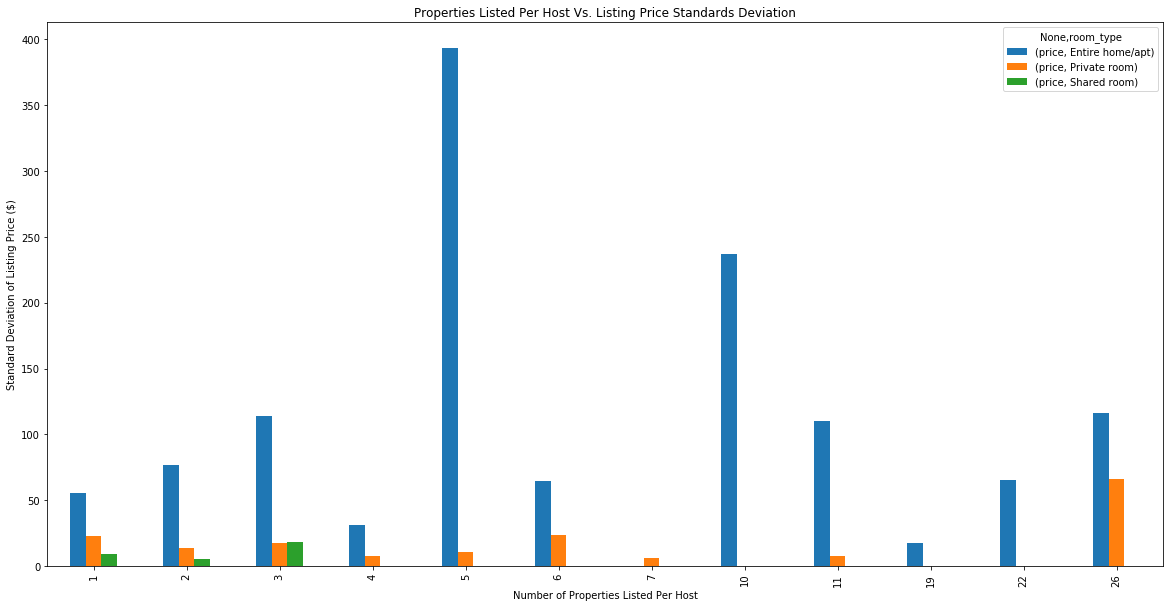

In [13]:
#Create subset df with only require columns
dfQ3a = df[['calculated_host_listings_count','room_type', 'price']]
#Group by 'calculated_host_listings_count','room_type' and calculate grouped standard deviation of price.
dfQ3a = dfQ3a.groupby(['calculated_host_listings_count','room_type']).agg(np.std).unstack(fill_value=0).plot.bar(figsize=(20,10),title='Properties Listed Per Host Vs. Listing Price Standards Deviation')
#Create grouped bar chart
dfQ3a.set_xlabel('Number of Properties Listed Per Host')  
dfQ3a.set_ylabel('Standard Deviation of Listing Price ($)')
plt.show()


**Q3 Discussion**

There was definitely a trend of hosts with fewer listings having more shared/private rooms, whereas hosts with more listings tend to go for more entire properties.
Also, hosts with fewer listings tended to have less variance in the list price of the rental, whereas hosts with more listings showed much more deviation from the mean.
However it must be said that the sample of hosts with listings > 4 are very small and perhaps are not big enough to represent a fair sample. 

### References:
- https://stackoverflow.com/
- https://www.kite.com/python
- https://mathbitsnotebook.com/Algebra1/StatisticsData/STSD.html
- https://pandas.pydata.org/
- https://matplotlib.org/
- https://jamesrledoux.com/code/group-by-aggregate-pandas
- https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html